In [72]:
import numpy as np
import pandas as pd
import os

In [73]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.info()
# to check if any value is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [75]:
#to check duplicated rows
df.duplicated().sum()

0

In [76]:
df['Exited'].value_counts()
# visible that it's class imbalance

0    7963
1    2037
Name: Exited, dtype: int64

In [77]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [78]:
# Should do EDA not doinh in here

In [79]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [80]:
# scale the values
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [81]:
X_train.shape
x_test.shape


(2000, 11)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(x_test)

In [83]:
import tensorflow

In [84]:
from tensorflow import keras
from tensorflow.keras import Sequential


In [85]:
from tensorflow.keras.layers import Dense

In [86]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [88]:
history = model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.6592 - accuracy: 0.6073 - val_loss: 0.5409 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5033 - accuracy: 0.7972 - val_loss: 0.4902 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4694 - accuracy: 0.7972 - val_loss: 0.4660 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4504 - accuracy: 0.7972 - val_loss: 0.4487 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4370 - accuracy: 0.7995 - val_loss: 0.4372 - val_accuracy: 0.8062
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4291 - accuracy: 0.8125 - val_loss: 0.4318 - val_accuracy: 0.8056
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.8206 - val_loss: 0.4279 - val_accuracy: 0.8125

In [89]:
model.layers[0].get_weights()


[array([[ 0.14514713,  0.02940232, -0.29400203, -0.23472308, -0.09840095,
          0.00700645, -0.2118472 ,  0.22600198,  0.01733837,  0.14807406,
         -0.28728363],
        [-1.2104863 , -0.35610288, -0.40694076,  0.35160583,  0.32060707,
         -1.1366037 , -0.13752986, -0.538873  ,  0.31747016,  0.58853143,
         -0.51766354],
        [ 0.09023159, -0.02479002, -0.13086355,  0.12666719,  0.07651721,
         -0.13444822,  0.08639076, -0.3817907 ,  0.2202509 ,  0.4006282 ,
          0.26784748],
        [ 0.5242688 , -0.06442241,  0.08784433, -0.08748117,  0.12430862,
         -0.3139088 , -0.9110704 , -0.46695682, -0.49543312, -0.60713273,
          0.29985   ],
        [-0.3696493 ,  0.73543364, -0.6880662 , -0.09273369,  1.3816794 ,
          0.19376062, -0.12784152,  0.23302102, -0.9014516 ,  0.39867723,
          0.03021454],
        [ 0.28492004,  0.43695053,  0.20084673, -0.3997309 , -0.09880355,
         -0.3831952 , -0.72936165,  0.25700128, -0.18653241,  0.2005771

In [90]:
y_log = model.predict(X_test_trf)

In [91]:
y_pred = np.where(y_log>0.5,1,0)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

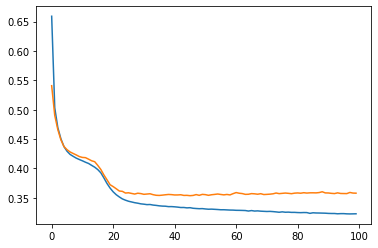

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


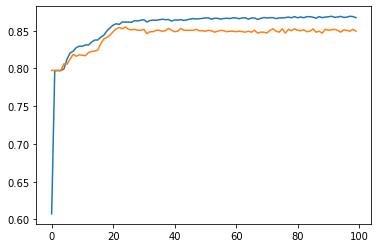

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])